### Module 4
# Trade Call Prediction using Classification

In this module, we'd be covering the concept of classification and utilize our skills to solve the following queries – (Stock Price = Close Price)

## Problem Statements

`


## Problem 4.1 

Import the csv file of the stock which contained the Bollinger columns as well.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("RELIANCE.csv", parse_dates=True)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32


In [3]:
df.shape

(495, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 15 columns):
Symbol                    495 non-null object
Series                    495 non-null object
Date                      495 non-null object
Prev Close                495 non-null float64
Open Price                495 non-null float64
High Price                495 non-null float64
Low Price                 495 non-null float64
Last Price                495 non-null float64
Close Price               495 non-null float64
Average Price             495 non-null float64
Total Traded Quantity     495 non-null int64
Turnover                  495 non-null float64
No. of Trades             495 non-null int64
Deliverable Qty           495 non-null int64
% Dly Qt to Traded Qty    495 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 58.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Symbol                    0
Series                    0
Date                      0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

## [Source: For Calculating Bollinger Bands](https://towardsdatascience.com/trading-technical-analysis-with-pandas-43e737a17861)

[**Bollinger Bands**](https://www.bollingerbands.com/bollinger-bands) is used to define the prevailing high and low prices in a market to characterize the trading band of a financial instrument or commodity. Bollinger Bands are a volatility indicator. Bands are consists of Moving Average (MA) line, a upper band and lower band. The upper and lower bands are simply MA adding and subtracting standard deviation. Standard deviation is a measurement of volatility. That’s why it’s a volatility indictor.

Create a new column 'Call', whose entries are -
- 'Buy' if the stock price is below the lower Bollinger band
- 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
- 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
- 'Short' if the stock price is above the upper Bollinger band

In [7]:
# calculating Simple Moving Average with 20 days window
df['sma'] = df['Close Price'].rolling(window=20).mean()

# calculating the standar deviation
df['rstd'] = df['Close Price'].rolling(window=20).std()

In [8]:
df['upper_band'] = df['sma'] + 2 * df['rstd']
df['lower_band'] = df['sma'] - 2 * df['rstd']
df['mid_band'] = (df['upper_band'] + df['lower_band']) / 2
df.dropna(inplace=True)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,sma,rstd,upper_band,lower_band,mid_band
19,RELIANCE,EQ,09-Jun-2017,1331.70,1345.10,1352.95,1331.0,1332.95,1335.70,1340.93,3162802,4.241089e+09,78984,1333930,42.18,1331.2675,17.996668,1367.260837,1295.274163,1331.2675
20,RELIANCE,EQ,12-Jun-2017,1335.70,1326.55,1329.75,1317.0,1319.00,1319.45,1321.07,1927513,2.546372e+09,44210,1194367,61.96,1330.0350,17.915475,1365.865950,1294.204050,1330.0350
21,RELIANCE,EQ,13-Jun-2017,1319.45,1320.60,1327.00,1311.0,1312.00,1314.35,1318.87,1377291,1.816467e+09,63864,679324,49.32,1327.9375,17.116473,1362.170446,1293.704554,1327.9375
22,RELIANCE,EQ,14-Jun-2017,1314.35,1315.90,1360.00,1315.9,1360.00,1357.50,1348.06,12101027,1.631296e+10,139964,7232727,59.77,1328.1575,17.481300,1363.120101,1293.194899,1328.1575
23,RELIANCE,EQ,15-Jun-2017,1357.50,1360.00,1395.00,1359.1,1377.35,1383.95,1379.51,6466804,8.921028e+09,122808,2913028,45.05,1330.9875,21.470046,1373.927591,1288.047409,1330.9875


In [9]:
def call(df):
    if df['Close Price'] < df['lower_band']:
        return "Buy"
    elif (df['Close Price'] > df['lower_band']) and (df['Close Price'] < df['mid_band']):
        return "Hold Buy/Liquidate Short"
    elif (df['Close Price'] > df['mid_band']) and (df['Close Price'] < df['upper_band']):
        return "Hold Short/Liquidate Buy"
    else:
        return "Short"

In [10]:
df['Call'] = df.apply(call, axis = 1)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,sma,rstd,upper_band,lower_band,mid_band,Call
19,RELIANCE,EQ,09-Jun-2017,1331.70,1345.10,1352.95,1331.0,1332.95,1335.70,1340.93,...,4.241089e+09,78984,1333930,42.18,1331.2675,17.996668,1367.260837,1295.274163,1331.2675,Hold Short/Liquidate Buy
20,RELIANCE,EQ,12-Jun-2017,1335.70,1326.55,1329.75,1317.0,1319.00,1319.45,1321.07,...,2.546372e+09,44210,1194367,61.96,1330.0350,17.915475,1365.865950,1294.204050,1330.0350,Hold Buy/Liquidate Short
21,RELIANCE,EQ,13-Jun-2017,1319.45,1320.60,1327.00,1311.0,1312.00,1314.35,1318.87,...,1.816467e+09,63864,679324,49.32,1327.9375,17.116473,1362.170446,1293.704554,1327.9375,Hold Buy/Liquidate Short
22,RELIANCE,EQ,14-Jun-2017,1314.35,1315.90,1360.00,1315.9,1360.00,1357.50,1348.06,...,1.631296e+10,139964,7232727,59.77,1328.1575,17.481300,1363.120101,1293.194899,1328.1575,Hold Short/Liquidate Buy
23,RELIANCE,EQ,15-Jun-2017,1357.50,1360.00,1395.00,1359.1,1377.35,1383.95,1379.51,...,8.921028e+09,122808,2913028,45.05,1330.9875,21.470046,1373.927591,1288.047409,1330.9875,Short


Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [11]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scr = StandardScaler()
lbc = LabelEncoder()

In [12]:
x = df[['Close Price', 'lower_band', 'mid_band', 'upper_band']]
x = scr.fit_transform(x)
y = df['Call']
y = lbc.fit_transform(y).reshape(-1, 1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
max_features = y.max()

In [16]:
from collections import OrderedDict

In [17]:
classifier_models = OrderedDict([
    ("Nearest Neighbors", KNeighborsClassifier(max_features)),
    ("Linear SVM",        SVC(kernel="linear", C=0.025)),
    ("RBF SVM",           SVC(gamma=2, C=1)),
    ("Decision Tree",     DecisionTreeClassifier(max_depth=5)),
    ("Random Forest",     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=max_features)),
    ("AdaBoost",          AdaBoostClassifier()),
    ("Naive Bayes",       GaussianNB())
])

classifier_models

OrderedDict([('Nearest Neighbors',
              KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                         weights='uniform')),
             ('Linear SVM',
              SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
                kernel='linear', max_iter=-1, probability=False, random_state=None,
                shrinking=True, tol=0.001, verbose=False)),
             ('RBF SVM', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
                max_iter=-1, probability=False, random_state=None, shrinking=True,
                tol=0.001, verbose=False)),
             ('Decision Tree',
              DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                      

In [18]:
accuracy_scores = {}
for model_name, classifier in classifier_models.items():
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores[model_name] = classifier.score(X_test, Y_test)
    
accuracy_scores = OrderedDict(sorted(accuracy_scores.items(), key=lambda x: x[1]))
accuracy_scores

C:\Users\Jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jesus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

OrderedDict([('Naive Bayes', 0.5174825174825175),
             ('Linear SVM', 0.5454545454545454),
             ('AdaBoost', 0.6713286713286714),
             ('Decision Tree', 0.7272727272727273),
             ('RBF SVM', 0.7692307692307693),
             ('Random Forest', 0.7832167832167832),
             ('Nearest Neighbors', 0.8041958041958042)])

In [19]:
hero_df = pd.read_csv('HEROMOTOCO.csv', parse_dates=['Date'])
hero_df.set_index('Date', inplace=True)

hero_df["sma"] = hero_df["Close Price"].rolling(20).mean()
hero_df["std"] = hero_df["Close Price"].rolling(20).std()
hero_df["upper_band"] = hero_df["sma"] + hero_df["std"] * 2
hero_df["lower_band"] = hero_df["sma"] - hero_df["std"] * 2

In [20]:
hero_df.isnull().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open Price                 0
High Price                 0
Low Price                  0
Last Price                 0
Close Price                0
Average Price              0
Total Traded Quantity      0
Turnover                   0
No. of Trades              0
Deliverable Qty            0
% Dly Qt to Traded Qty     0
sma                       19
std                       19
upper_band                19
lower_band                19
dtype: int64

In [21]:
hero_df   = hero_df.dropna()
hero_X = scr.fit_transform(hero_df[['Close Price', 'std', 'upper_band', 'lower_band']])

hero_df['Call'] = classifier_models["Nearest Neighbors"].predict(hero_X)


hero_df.to_csv('hero_trained.csv')

In [22]:
print("hero_df['Call'].unique() =", hero_df['Call'].unique())
hero_df.head()

hero_df['Call'].unique() = [2 1 3]


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,sma,std,upper_band,lower_band,Call
Date,,,,,,,,,,,,,,,,,,,
2017-06-09,HEROMOTOCO,EQ,3784.45,3796.3,3800.50,3755.60,3786.00,3780.10,3779.46,302560,1.143514e+09,19861,198672,65.66,3684.0600,107.366537,3898.793074,3469.326926,2
2017-06-12,HEROMOTOCO,EQ,3780.10,3777.0,3790.00,3760.35,3771.05,3773.25,3779.97,182605,6.902422e+08,17760,117935,64.58,3696.9500,101.366032,3899.682063,3494.217937,2
2017-06-13,HEROMOTOCO,EQ,3773.25,3780.0,3785.35,3742.25,3751.00,3752.50,3765.91,212476,8.001665e+08,16843,128289,60.38,3703.6050,100.370995,3904.346989,3502.863011,2
2017-06-14,HEROMOTOCO,EQ,3752.50,3764.0,3808.00,3751.05,3781.30,3789.05,3788.77,374661,1.419506e+09,39825,260012,69.40,3710.7600,101.142230,3913.044460,3508.475540,2
2017-06-15,HEROMOTOCO,EQ,3789.05,3786.0,3820.00,3760.00,3774.00,3777.70,3785.08,163019,6.170397e+08,14888,94856,58.19,3720.0425,98.148884,3916.340269,3523.744731,2


In [23]:
hero_df.reset_index(inplace=True)

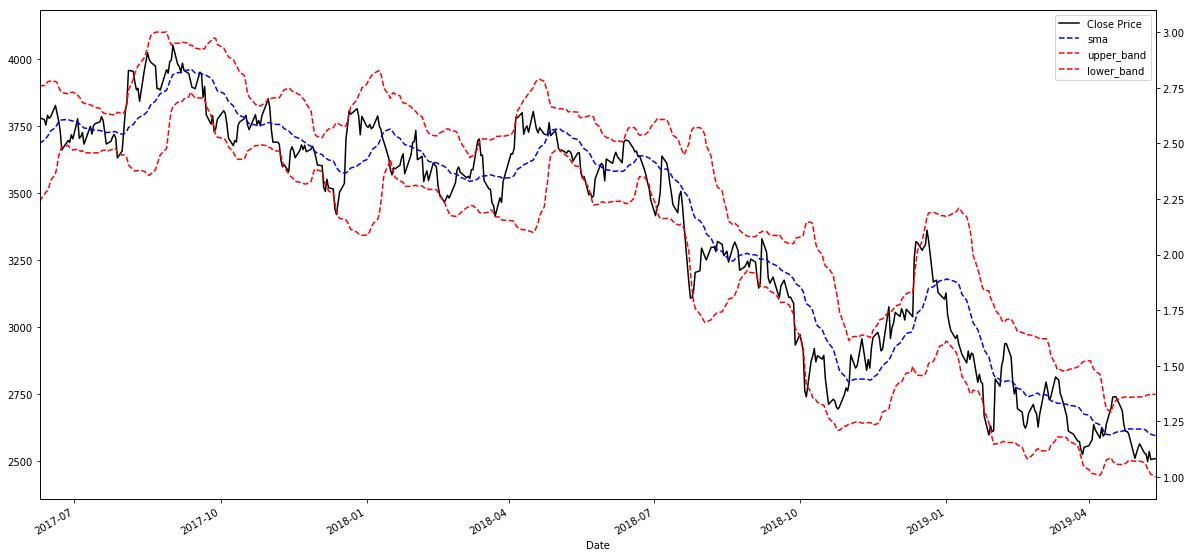

In [24]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.gca()
ax2 = ax1.twinx()


hero_df.plot(kind='line',x='Date', y='Close Price', ax=ax1, color='black')
hero_df.plot(kind='line',x='Date', y='sma', ax=ax1, color='blue', linestyle='--')
hero_df.plot(kind='line',x='Date', y='upper_band', ax=ax1, color='red',  linestyle='--')
hero_df.plot(kind='line',x='Date', y='lower_band', ax=ax1, color='red',  linestyle='--')
ax2.plot(hero_df['Call'])

## Problem 4.2 

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.


Import the stock data file of your choice

In [25]:
maruthi_df = pd.read_csv('MARUTI.csv').set_index('Date')

maruthi_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
15-May-2017,MARUTI,EQ,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01
16-May-2017,MARUTI,EQ,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97
17-May-2017,MARUTI,EQ,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37
18-May-2017,MARUTI,EQ,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44
19-May-2017,MARUTI,EQ,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49


In [26]:
maruthi_df.shape

(496, 14)

In [27]:
maruthi_df.isnull().sum()

Symbol                    0
Series                    0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

Define 4 new columns , whose values are:
* % change between Open and Close price for the day
* % change between Low and High price for the day
* 5 day rolling mean of the day to day % change in Close Price
* 5 day rolling std of the day to day % change in Close Price

In [28]:
maruthi_df['price_Open_Close'] = (maruthi_df['Close Price'] - maruthi_df['Open Price']) / maruthi_df['Open Price']
maruthi_df['price_High_Low'] = (maruthi_df['High Price']  - maruthi_df['Low Price']) / maruthi_df['Low Price']

maruthi_df['Day_Perc_Change'] = maruthi_df['Close Price'].pct_change().fillna(0)

maruthi_df['5day_mean'] = maruthi_df['Day_Perc_Change'].rolling(5).mean()
maruthi_df['5day_std'] = maruthi_df['Day_Perc_Change'].rolling(5).std()

maruthi_df.dropna(inplace=True)

maruthi_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,price_Open_Close,price_High_Low,Day_Perc_Change,5day_mean,5day_std
Date,,,,,,,,,,,,,,,,,,,
19-May-2017,MARUTI,EQ,6831.05,6854.80,6893.90,6691.55,6756.30,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,-0.009373,0.030240,-0.005929,-0.000907,0.013496
22-May-2017,MARUTI,EQ,6790.55,6803.95,6843.95,6689.25,6694.30,6701.70,6732.22,327493,2.204756e+09,36146,158645,48.44,-0.015028,0.023127,-0.013084,-0.003523,0.014507
23-May-2017,MARUTI,EQ,6701.70,6765.00,6910.00,6743.65,6867.95,6878.85,6855.36,956457,6.556860e+09,98981,414258,43.31,0.016829,0.024668,0.026434,-0.002048,0.017453
24-May-2017,MARUTI,EQ,6878.85,6903.00,6912.55,6813.00,6865.00,6869.65,6863.75,433647,2.976444e+09,48950,191595,44.18,-0.004831,0.014612,-0.001337,-0.002438,0.017400
25-May-2017,MARUTI,EQ,6869.65,6879.95,7018.00,6835.00,6970.00,6985.70,6916.65,435721,3.013730e+09,44648,177404,40.72,0.015371,0.026774,0.016893,0.004595,0.016482


Create a new column 'Action' whose values are:

* 1 if next day's price(Close) is greater than present day's.
* (-1) if next day's price(Close) is less than present day's.
* i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
* i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

In [29]:
maruthi_df['Action'] = np.where(maruthi_df['Close Price'].shift(-1) > maruthi_df['Close Price'], 1, -1 )

maruthi_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,price_Open_Close,price_High_Low,Day_Perc_Change,5day_mean,5day_std,Action
Date,,,,,,,,,,,,,,,,,,,,
19-May-2017,MARUTI,EQ,6831.05,6854.80,6893.90,6691.55,6756.30,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,-0.009373,0.030240,-0.005929,-0.000907,0.013496,-1
22-May-2017,MARUTI,EQ,6790.55,6803.95,6843.95,6689.25,6694.30,6701.70,6732.22,327493,2.204756e+09,36146,158645,48.44,-0.015028,0.023127,-0.013084,-0.003523,0.014507,1
23-May-2017,MARUTI,EQ,6701.70,6765.00,6910.00,6743.65,6867.95,6878.85,6855.36,956457,6.556860e+09,98981,414258,43.31,0.016829,0.024668,0.026434,-0.002048,0.017453,-1
24-May-2017,MARUTI,EQ,6878.85,6903.00,6912.55,6813.00,6865.00,6869.65,6863.75,433647,2.976444e+09,48950,191595,44.18,-0.004831,0.014612,-0.001337,-0.002438,0.017400,1
25-May-2017,MARUTI,EQ,6869.65,6879.95,7018.00,6835.00,6970.00,6985.70,6916.65,435721,3.013730e+09,44648,177404,40.72,0.015371,0.026774,0.016893,0.004595,0.016482,1


In [30]:
maruthi_df.to_csv('maruthi_trained.csv')

Construct a classification model with the 4 new inputs and 'Action' as target

In [31]:
maruthi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 19-May-2017 to 13-May-2019
Data columns (total 20 columns):
Symbol                    492 non-null object
Series                    492 non-null object
Prev Close                492 non-null float64
Open Price                492 non-null float64
High Price                492 non-null float64
Low Price                 492 non-null float64
Last Price                492 non-null float64
Close Price               492 non-null float64
Average Price             492 non-null float64
Total Traded Quantity     492 non-null int64
Turnover                  492 non-null float64
No. of Trades             492 non-null int64
Deliverable Qty           492 non-null int64
% Dly Qt to Traded Qty    492 non-null float64
price_Open_Close          492 non-null float64
price_High_Low            492 non-null float64
Day_Perc_Change           492 non-null float64
5day_mean                 492 non-null float64
5day_std                  492 non-null float

In [32]:
maruthi_df.isnull().sum()

Symbol                    0
Series                    0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
price_Open_Close          0
price_High_Low            0
Day_Perc_Change           0
5day_mean                 0
5day_std                  0
Action                    0
dtype: int64

In [33]:
maruthi_df.dropna(inplace=True)
X = maruthi_df[['price_Open_Close', 'price_High_Low', '5day_mean', '5day_std']]
Y = maruthi_df['Action']


X = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


rfc = RandomForestClassifier(n_estimators=100, max_features=2)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
rfc.fit(X_train,  Y_train)
rfc.score(X_test, Y_test)

0.5153374233128835

Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

![image](img.png)

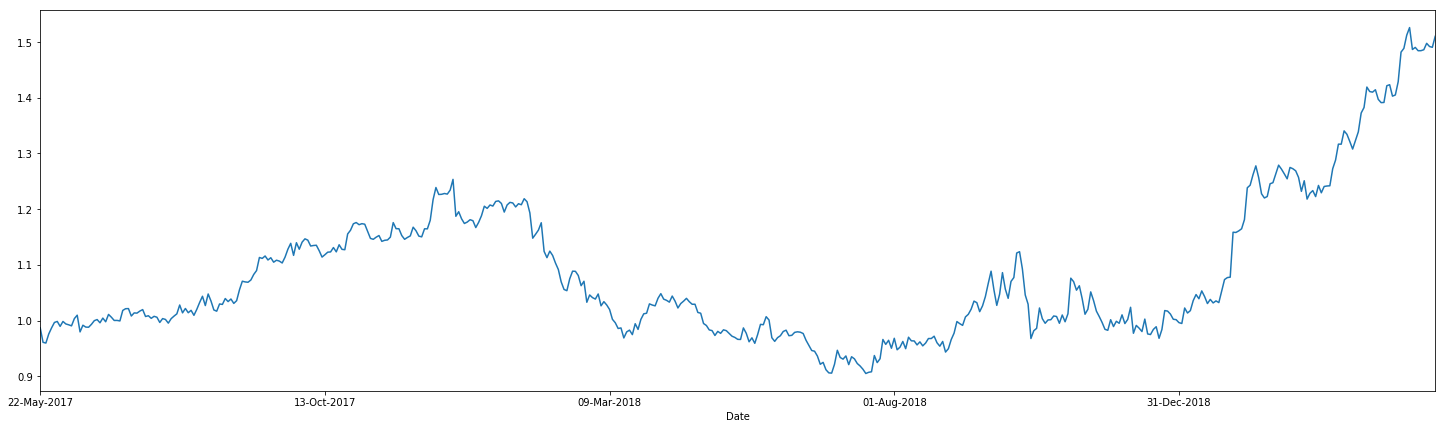

In [35]:
# Cumulative Product of PCT change in Close_Price with predicted actions
plt.figure(figsize=(25, 7))

cumulative_returns = ( 1 + (maruthi_df['Close Price'].pct_change() * maruthi_df['Action']) ).dropna().cumprod()
cumulative_returns.plot()